# **Import Libraries and modules**

Installing keras using the pip command and importing to implement the following project

In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


Importing necessary tools to run the program

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading the test and train datasets to its particular variables so that we can train the model that we want and we can test the model using the test dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Printing the image that is stored in the first row of the dataset.

(60000, 28, 28)


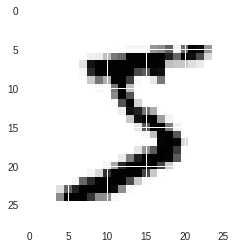

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all the values which are present in each row from **28 x 28** to **28 x 28 x 1** so that we can get multiple channels and that will help us to get the dominating features in the image. 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Converting all the values  of the image. At first, all the values will be in the range of 0 - 255. We are going to normalize all of this value between the range of 0 - 1 so that it becomes less heavy for calculations 

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Checking out the kind of values that are present in y. 

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Performing one-hot encoding on the y data which is present. When once we perform one hot encoding, the values lie in the range of 0 - 1. 

Having the value 1 in a particular column, it indicates that the output of that row is the index value number. Basically, if 1 is present in the 0th column, then the output value is 0 but if 1 is present in the 7th column, then the output is 7

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1), border_mode='same')) # 28
model.add(Convolution2D(64, (3, 3), activation='relu')) # 26 
model.add(Convolution2D(32, 1, activation='relu')) # 26
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu')) # 11
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu')) # 9
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  """


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=25, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 21s 443us/step - loss: 0.2037 - acc: 0.9349 - val_loss: 0.0658 - val_acc: 0.9808
Epoch 2/25
48000/48000 [==============================] - 20s 410us/step - loss: 0.0585 - acc: 0.9820 - val_loss: 0.0568 - val_acc: 0.9829
Epoch 3/25
48000/48000 [==============================] - 19s 404us/step - loss: 0.0425 - acc: 0.9867 - val_loss: 0.0438 - val_acc: 0.9884
Epoch 4/25
48000/48000 [==============================] - 20s 412us/step - loss: 0.0340 - acc: 0.9894 - val_loss: 0.0558 - val_acc: 0.9838
Epoch 5/25
48000/48000 [==============================] - 19s 403us/step - loss: 0.0270 - acc: 0.9915 - val_loss: 0.0399 - val_acc: 0.9877
Epoch 6/25
48000/48000 [==============================] - 20s 407us/step - loss: 0.0226 - acc: 0.9926 - val_loss: 0.0493 - val_acc: 0.9854
Epoch 7/25
48000/48000 [==============================] - 19s 396us/step - loss: 0.0211 - acc: 0.9932 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.039988077734033914, 0.9918]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.0791335e-19 2.3716131e-13 1.0397503e-11 9.3622516e-13 1.0483143e-16
  8.8659236e-18 1.3626180e-27 1.0000000e+00 1.9595114e-15 4.3143067e-12]
 [2.6957696e-23 4.2621580e-15 1.0000000e+00 1.4138925e-25 1.7375299e-28
  1.4243521e-24 5.9040062e-22 1.8605741e-20 6.3237765e-26 1.9104977e-26]
 [6.2599919e-15 1.0000000e+00 1.6565979e-12 4.6969213e-19 9.9613846e-14
  1.3251222e-13 6.5114446e-16 2.0190437e-10 2.3165881e-15 5.8256766e-16]
 [1.0000000e+00 2.8238808e-16 1.5131783e-13 3.0379494e-12 4.8910035e-17
  1.2773008e-11 7.8090974e-09 6.3016549e-12 3.0112812e-11 2.2598180e-12]
 [1.5926907e-20 1.1012184e-21 1.4843472e-20 9.4805389e-22 1.0000000e+00
  1.2311252e-21 3.4879647e-20 7.3980661e-19 2.9368627e-17 2.4749872e-14]
 [6.3276305e-13 1.0000000e+00 1.9405725e-11 3.9958188e-18 1.2250125e-12
  1.7506208e-12 1.2141342e-14 1.0430029e-09 2.2239829e-14 2.8825636e-14]
 [3.2349655e-16 1.4260740e-07 1.1156237e-10 1.0314127e-15 9.9999988e-01
  5.3624605e-10 5.1606554e-15 1.9297865e-08 1.3461542e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

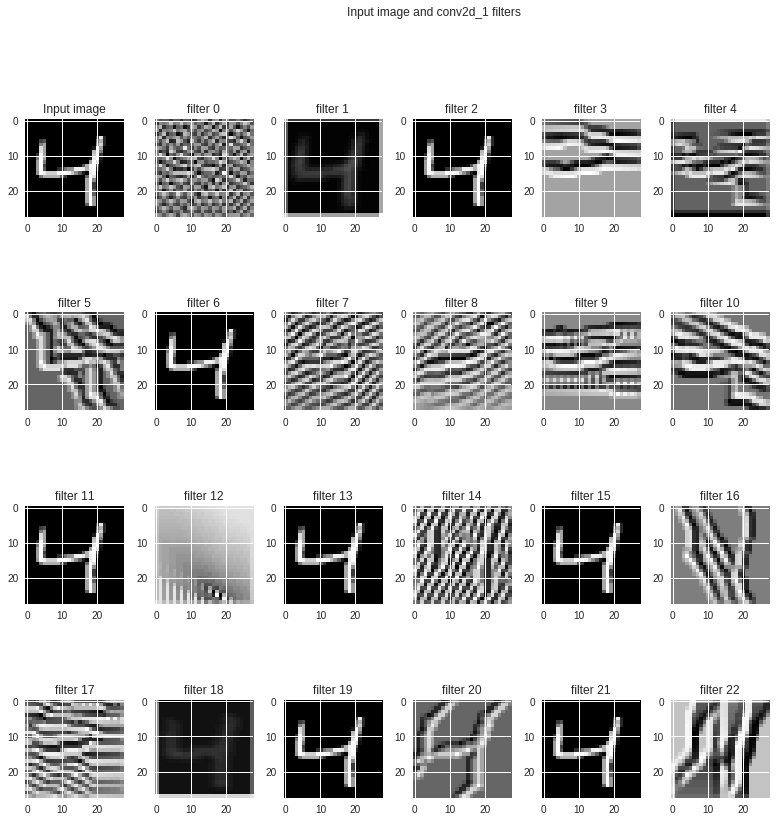

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()